### 任务1.1读取一张图片数据并用Python查看图片， 截取图像的有效区域

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
image = Image.open('C:/Users/lenovo/Desktop/images/1_1.jpg')
plt.imshow(image)
plt.show()# 需要调用show()方法，不然图像只会在内存中而不显示出来

<Figure size 640x480 with 1 Axes>

In [2]:
image_size=image.size
print(image_size)

(2272, 1704)


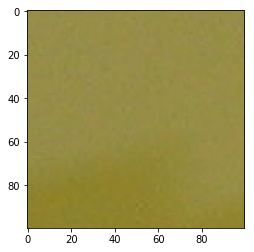

In [3]:
L,T=image.size
box=[L/2-50,T/2-50,L/2+50,T/2+50]
region = image.crop(box)
data = np.array(region)
plt.imshow(data)
plt.show()

### 任务1.2将图片数据划分为RGB三个颜色通道，分别将三个颜色通道的图片数据转换为像素值矩阵

In [4]:
print(data.shape)
print(data.dtype)  #括号中的三个数分别代表（行，列，颜色通道），dtype则显示出数组元素的数据类型。

(100, 100, 3)
uint8


In [5]:
image_get=image.getpixel((0,0))   #查看像素
print(image_get)

(91, 82, 51)


In [6]:
R,G,B=region.split()
r0=np.array(R)###将图片的每个像素的RGB值得出
g0=np.array(G)
b0=np.array(B)

In [7]:
print(r0,g0,b0)

[[154 153 151 ... 151 152 152]
 [153 152 151 ... 151 150 151]
 [152 152 151 ... 151 148 148]
 ...
 [143 142 139 ... 144 142 142]
 [142 142 139 ... 144 141 142]
 [142 142 139 ... 146 142 142]] [[140 139 141 ... 142 142 142]
 [140 139 141 ... 142 141 142]
 [139 139 141 ... 141 140 140]
 ...
 [131 130 129 ... 132 131 131]
 [130 130 129 ... 132 130 132]
 [130 130 129 ... 131 132 132]] [[75 74 70 ... 73 70 70]
 [72 71 70 ... 73 66 67]
 [71 71 72 ... 72 65 65]
 ...
 [47 46 42 ... 46 49 49]
 [46 46 42 ... 46 48 47]
 [48 48 42 ... 46 45 45]]


### 任务1.3了解水质图像特征-颜色矩，自定义计算三阶颜色矩的函数

In [8]:
def calculate_region(data):
    data1=data.mean()
    if np.mean((data-data1)**3)>=0:
        data3=pow(np.mean((data-data1)**3),1/3)
    else:
        data3=-pow(abs(np.mean((data-data1)**3)),1/3)
    return data3

In [9]:
x = calculate_region(data)

In [10]:
x

-34.49128467929807

### 任务1.4用Python分别计算三个颜色通道的一阶颜色矩、二阶颠色矩和三阶颜色矩

In [11]:
r,g,b = region.split()
rc = np.asarray(r)
gc = np.asarray(g) 
bc = np.asarray(b) 
r1 = rc.mean()
g1 = gc.mean()
b1 = bc.mean()
r2 = rc.std()
g2 = gc.std()
b2 = bc.std()
r3 = calculate_region(rc)
g3 = calculate_region(gc)
b3 = calculate_region(bc)

In [12]:
x=[r1,r2,r3,g1,g2,g3,b1,b2,b3]

In [13]:
print(x)

[148.6037, 3.633076700263841, -3.2214983345090045, 138.6396, 4.12833039375484, -4.095493278954723, 64.3687, 10.4990456856802, -10.55785921144368]


### 任务1.5自定义函数正确获取指定路径中的所有图片名称

In [14]:
def listfile(dirpath):
    import os
    imageName_list = os.listdir(dirpath)
    imagePath_list = [os.path.join(dirpath, imageName)for imageName in imageName_list]
    return imagePath_list

In [15]:
dirpath=r'C:/Users/lenovo/Desktop/images'
listfile(dirpath)

['C:/Users/lenovo/Desktop/images\\1_1.jpg',
 'C:/Users/lenovo/Desktop/images\\1_10.jpg',
 'C:/Users/lenovo/Desktop/images\\1_11.jpg',
 'C:/Users/lenovo/Desktop/images\\1_12.jpg',
 'C:/Users/lenovo/Desktop/images\\1_13.jpg',
 'C:/Users/lenovo/Desktop/images\\1_14.jpg',
 'C:/Users/lenovo/Desktop/images\\1_15.jpg',
 'C:/Users/lenovo/Desktop/images\\1_16.jpg',
 'C:/Users/lenovo/Desktop/images\\1_17.jpg',
 'C:/Users/lenovo/Desktop/images\\1_18.jpg',
 'C:/Users/lenovo/Desktop/images\\1_19.jpg',
 'C:/Users/lenovo/Desktop/images\\1_2.jpg',
 'C:/Users/lenovo/Desktop/images\\1_20.jpg',
 'C:/Users/lenovo/Desktop/images\\1_21.jpg',
 'C:/Users/lenovo/Desktop/images\\1_22.jpg',
 'C:/Users/lenovo/Desktop/images\\1_23.jpg',
 'C:/Users/lenovo/Desktop/images\\1_24.jpg',
 'C:/Users/lenovo/Desktop/images\\1_25.jpg',
 'C:/Users/lenovo/Desktop/images\\1_26.jpg',
 'C:/Users/lenovo/Desktop/images\\1_27.jpg',
 'C:/Users/lenovo/Desktop/images\\1_28.jpg',
 'C:/Users/lenovo/Desktop/images\\1_29.jpg',
 'C:/Users/l

### 任务1.6自定义函数，用循环语句计算所有图片的颜色矩和获取图片标签，分别保存为数组. 

In [16]:
import os
import pandas as pd
import numpy as np
def getimagedata(path):
    filename = os.listdir(path)
    n = len(filename)
    data = np.zeros([n,10])
    for i in range(n):
            img = Image.open(path+'\\'+filename[i])
            M,N = img.size
            img = img.crop((M/2-50,N/2-50,M/2+50,N/2+50))
            r,g,b = img.split()
            rd = np.asarray(r)
            gd = np.asarray(g)
            bd = np.asarray(b)
            data[i,0] = rd.mean()
            data[i,1] = gd.mean()
            data[i,2] = bd.mean()
            data[i,3] = rd.std()
            data[i,4] = gd.std()
            data[i,5] = bd.std()
            data[i,6] = calculate_region(rd)
            data[i,7] = calculate_region(gd)
            data[i,8] = calculate_region(bd)
            data[i,9] = filename[i][0]
    data1=pd.DataFrame(data,
                  columns=['R通道一阶矩','G通道一阶矩','B通道一阶矩',
                           'R通道二阶矩','G通道二阶矩','B通道二阶矩',
                           'R通道三阶矩','G通道三阶矩','B通道三阶矩','labels'])    
    return data1

In [17]:
dirpath=r'C:/Users/lenovo/Desktop/images'
tpdata = getimagedata(dirpath)

In [18]:
tpdata

R通道一阶矩    G通道一阶矩   B通道一阶矩    R通道二阶矩    G通道二阶矩     B通道二阶矩    R通道三阶矩  \
0    148.6037  138.6396  64.3687  3.633077  4.128330  10.499046 -3.221498   
1    163.6769  145.5470  54.4608  3.934350  2.840174   3.502551  2.440736   
2    153.9430  147.0834  71.9601  2.225657  1.810979   3.136608 -1.187074   
3    150.3724  151.3982  64.3164  2.037380  1.521590   2.728093  0.950138   
4    150.7381  150.9774  64.6204  1.918674  1.665260   3.110901 -0.345750   
5    150.1361  145.2686  81.3173  1.932971  1.285011   2.166615 -0.892524   
6    150.0692  146.1778  73.5247  1.879577  1.309346   3.031599  0.789261   
7    157.6231  137.6229  70.0017  2.199556  1.572608   3.733430 -0.637415   
8    157.7101  137.5022  69.7587  2.269374  1.490367   3.609553  0.796269   
9    169.3895  146.9654  74.9039  2.805600  1.970432   4.879576 -1.311517   
10   178.6755  153.3363  74.7543  2.146672  1.821868   3.389444  0.587474   
11   143.7821  136.4173  69.3213  2.500244  2.003587   3.026461 -1.325708   
12   158.6423  139.8759  67.8979  2.576267  1.481047   3.070094 -0.552666   
13   155.9895  134.7537  60.8224  2.510376  1.747122   3.778288  1.473615   
14   159.1854  144.9119  82.3134  2.090365  1.183612   2.839609 -1.673637   
15   176.6264  169.4162  71.3183  2.282022  1.454846   3.087683  1.101609   
16   144.7830  149.2719  64.1380  2.000078  1.543946   3.333640 -0.866230   
17   140.2129  148.7381  75.1293  1.919785  1.371827   3.114961  0.730411   
18   143.5034  144.0036  73.6058  1.807758  1.295371   3.082695  1.212489   
19   169.2204  158.9491  53.9542  2.039663  1.498769   3.507179 -1.179668   
20   170.4801  158.1540  56.5626  1.865638  1.620643   2.770719 -0.992705   
21   147.2336  137.6153  71.6916  5.164691  3.797566   3.149268  2.497410   
22   160.7237  151.5355  76.1082  1.991973  1.508688   2.599556  0.870762   
23   163.1208  151.7779  61.2367  2.903000  2.240128   3.872786 -0.978144   
24   142.2996  136.5330  67.7939  3.347064  2.163772   3.671651 -2.109991   
25   158.2386  151.0328  56.1641  3.684952  2.768452   2.617398  0.807462   
26   156.4230  148.6322  57.1966  3.523418  2.765126   2.788001  1.224129   
27   153.9454  155.0435  64.7966  2.753837  1.693756   2.679147 -1.921351   
28   153.8736  153.5939  60.8940  2.548063  1.688781   2.799851 -1.452082   
29   161.7297  142.1404  46.3214  1.937069  1.510724   2.610690 -0.677997   
..        ...       ...      ...       ...       ...        ...       ...   
173  107.1930  111.1680  42.6395  2.885750  1.863270   2.746915 -1.643253   
174  117.3815  122.9673  62.5565  2.593561  1.599072   2.918700  1.106254   
175  104.5064   98.2699  43.3683  3.366535  2.256647   3.220909  1.768526   
176  111.7110  115.7734  45.4765  2.399183  1.695126   3.163992 -1.538548   
177  108.7294  117.1587  65.3023  5.526118  3.663702   4.412450  2.910015   
178  115.0254  123.5799  58.1264  2.192614  1.427101   2.940412  1.624928   
179  117.6245  119.2952  31.2883  2.513344  1.749073   3.038714 -0.493745   
180  111.3277  120.4135  48.7485  2.571831  1.761794   3.574919  2.352358   
181  116.9654  124.2199  55.6709  2.319440  1.489545   3.053751  0.998687   
182  111.0590  121.3959  60.2561  2.297503  1.563510   3.521834 -0.861371   
183  122.8485  121.6680  52.5329  2.088336  1.606542   3.055833  1.113637   
184  101.7064  108.5317  48.8134  3.691043  2.665782   4.004021  2.319503   
185  123.9075  123.9218  51.6140  2.022361  1.659845   3.108762  1.211794   
186  124.4192  124.3082  50.2999  2.042124  1.578484   2.956579  1.262520   
187  117.9868  120.5755  41.8928  2.067759  1.540941   2.817003 -1.069137   
188  115.4158  115.8254  43.1293  2.461932  1.618059   3.042134  1.616354   
189  121.9998  124.1537  39.9889  2.005044  1.489119   3.692584  1.125259   
190  102.5200  110.0062  45.2127  2.702628  1.859183   2.765693  1.614151   
191  124.6716  120.8302  46.6575  2.262555  2.231987   2.817657  0.751143   
192  111.6546  109.9849  48.3751  2.944062  2.329479   2.979530 -0.636717   
193

## 任务二

In [19]:
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(tpdata,test_size=0.2)

In [20]:
x_train=data_train.iloc[:,0:8]  #提取前9列
x_test=data_test.iloc[:,0:8]    
y_train=data_train.iloc[:,9]   #提取10列所有行
y_test=data_test.iloc[:,9]

In [21]:
#分类模型构建
from sklearn.tree import DecisionTreeClassifier   #DecisionTreeClassifier分类决策树函数
model = DecisionTreeClassifier().fit(x_train,y_train)
y_pre = model.predict(x_test)

In [22]:
model.score(x_test,y_test)

0.8536585365853658

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         1.0       0.83      0.71      0.77         7
         2.0       0.80      1.00      0.89         8
         3.0       0.90      0.90      0.90        20
         4.0       1.00      0.67      0.80         6
         5.0       0.00      0.00      0.00         0

   micro avg       0.85      0.85      0.85        41
   macro avg       0.71      0.66      0.67        41
weighted avg       0.88      0.85      0.86        41



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [24]:
#混淆矩阵
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pre))

[[ 5  0  2  0  0]
 [ 0  8  0  0  0]
 [ 1  1 18  0  0]
 [ 0  1  0  4  1]
 [ 0  0  0  0  0]]


In [25]:
#分类模型构建二
from sklearn.svm import SVC
model2=SVC().fit(x_train,y_train)
y_pre2=model2.predict(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
model2.score(x_test,y_test)

0.6585365853658537

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pre2))

              precision    recall  f1-score   support

         1.0       1.00      0.43      0.60         7
         2.0       1.00      0.50      0.67         8
         3.0       0.59      1.00      0.74        20
         4.0       0.00      0.00      0.00         6

   micro avg       0.66      0.66      0.66        41
   macro avg       0.65      0.48      0.50        41
weighted avg       0.65      0.66      0.59        41



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
#混淆矩阵
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pre2))

[[ 3  0  4  0]
 [ 0  4  4  0]
 [ 0  0 20  0]
 [ 0  0  6  0]]


## 任务三
### 两个模型比教后决策树模型精确度比较高，故选择决策树模型进行评估

In [29]:
#分类模型构建
from sklearn.tree import DecisionTreeClassifier   #DecisionTreeClassifier分类决策树函数
model = DecisionTreeClassifier().fit(x_train,y_train)
y_pre = model.predict(x_test)

In [30]:
model.score(x_test,y_test)

0.8780487804878049

In [31]:
from sklearn.metrics import recall_score,precision_score,f1_score,roc_curve

print('recall指标为:',recall_score(y_test,y_pre,average='weighted'))
print('precision指标为:',precision_score(y_test,y_pre,average='weighted'))
print('f1指标为:',f1_score(y_test,y_pre,average='weighted'))

recall指标为: 0.8780487804878049
precision指标为: 0.9109114249037227
f1指标为: 0.8871377944548677


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### ROC评估

In [32]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [33]:
# 加载数据
X = tpdata.iloc[:,0:8]  #提取前9列
y = tpdata.iloc[:,9]   #提取10列所有行

In [34]:
# 将标签二值化
y = label_binarize(y, classes=[0, 1, 2])
# 设置种类
n_classes = y.shape[1]

In [35]:
# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

In [36]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

In [37]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


In [38]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [39]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [40]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [41]:
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

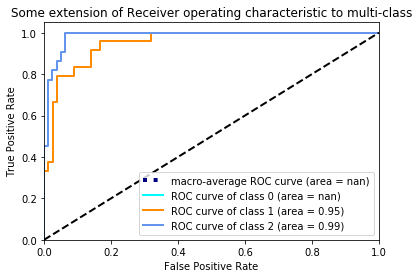

In [43]:
# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()